# Data Understanding



*   Instalasi opendatasets untuk proses import data dari Kaggle


In [1]:
!pip install opendatasets



*   Import dataset dari Kaggle (diperlukan username dan key dari akun Kaggle selama proses import dataset)

In [2]:
import opendatasets as od

# import dataset
od.download('https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: zulfianrahma
Your Kaggle Key: ··········


100%|██████████| 23.8M/23.8M [00:01<00:00, 20.0MB/s]




*   Membaca data-data dalam dataset dengan menggunakan fungsi pandas.read_csv

In [3]:
import pandas as pd

books = pd.read_csv('/content/book-recommendation-dataset/Books.csv')
ratings = pd.read_csv('/content/book-recommendation-dataset/Ratings.csv')
users = pd.read_csv('/content/book-recommendation-dataset/Users.csv')

print('Jumlah data buku: ', len(books.ISBN.unique()))
print('Jumlah penulis buku: ', len(books['Book-Author'].unique()))
print('Jumlah penerbit buku: ', len(books['Publisher'].unique()))

<ipython-input-3-66fab7f0fe71>:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('/content/book-recommendation-dataset/Books.csv')


Jumlah data buku:  271360
Jumlah penulis buku:  102024
Jumlah penerbit buku:  16808


# Univariate Exploratory Data Analysis

Variabel - variabel yang ada pada Book Recommendation Dataset adalah:

* Users : Memuat data pengguna. Perlu diketahui bahwa id pengguna (User-ID) sudah dianonimkan dan dipetakan ke dalam integer. Data demografi disediakan (Location, Age) jika data tersebut tersedia. Jika tidak, informasi tersebut akan mempunyai nilai NULL.
* Books : Buku diidentifikasi dengan nomor ISBN. Nomor ISBN yang tidak sesuai telah dihilangkan dari dataset. Selain itu, beberapa informasi berkaitan dengan buku telah disediakan (Book-Title, Book-Author, Year-Of-Publication, Publisher) dan diperoleh dari Amazon Web Services. Dalam kasus banyak penulis, hanya penulis pertama yang ditampilkan. Tautan URL untuk gambar cover buku juga disediakan dan memiliki tiga jenis kategori (Image-URL-S, Image-URL-M, Image-URL-L) yaitu small, medium, dan large. Tautan tersebut diarahkan pada halaman Amazon Web.
* Rating: Memuat informasi terkait penilaian buku. Nilai (Book-Rating) yang diberikan bisa secara eksplisit, diekspresikan dalam skala 1-10, atau secara implisit, diekspresikan sebagai nilai 0.



*   Melihat informasi pada variabel books

In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB




*   Melihat ada berapa banyak entri buku yang unik berdasarkan ISBN

In [5]:
print('Jumlah data buku: ', len(books.ISBN.unique()))

Jumlah data buku:  271360




*   Mengecek missing value pada variabel books dengan fungsi isnull()

In [6]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64



*   Melihat dataframe pada variabel books menggunakan fungsi head()


In [7]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...




*   Melihat informasi terkait entri penulis buku yang unik

In [8]:
print('Jumlah penulis buku: ', len(books['Book-Author'].unique()))
print('Nama - nama penulis buku: ', books['Book-Author'].unique())

Jumlah penulis buku:  102024
Nama - nama penulis buku:  ['Mark P. O. Morford' 'Richard Bruce Wright' "Carlo D'Este" ...
 'David Biggs' 'Teri Sloat' 'Christopher  Biffle']




*   Melihat informasi terkait entri penerbit buku yang unik

In [9]:
print('Jumlah penerbit buku: ', len(books['Publisher'].unique()))
print('Nama - nama penerbit buku: ', books['Publisher'].unique())

Jumlah penerbit buku:  16808
Nama - nama penerbit buku:  ['Oxford University Press' 'HarperFlamingo Canada' 'HarperPerennial' ...
 'Tempo' 'Life Works Books' 'Connaught']




*   Melihat informasi pada variabel ratings


In [10]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB




*   Melihat ada berapa banyak entri penilaian buku yang unik berdasarkan User-ID

In [11]:
print('Jumlah data penilaian buku: ', len(ratings['User-ID'].unique()))

Jumlah data penilaian buku:  105283




*   Mengecek missing value pada variabel ratings dengan fungsi isnull()

In [12]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64



*   Melihat dataframe pada variabel ratings menggunakan fungsi head()

In [13]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6




*   Menghitung jumlah rating, menggabungkannya berdasarkan ISBN, dan kemudian diurutkan mulai dari rating maksimal


In [14]:
ratings.groupby('ISBN').sum().sort_values(by='Book-Rating', ascending=False)

,User-ID,Book-Rating
ISBN,,
0316666343,182243428,5787
0385504209,120940891,4108
0312195516,99657290,3134
0679781587,90867127,2800
059035342X,79852541,2798
...,...,...
082176690,101209,0
0394724844,63394,0
0821766937,907448,0




*   Melihat distribusi statistik pada variabel ratings

In [15]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01




*   Melihat informasi pada variabel users


In [16]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB




*   Melihat ada berapa banyak entri pengguna yang unik berdasarkan User-ID

In [17]:
print('Jumlah data profil pengguna: ', len(users['User-ID'].unique()))

Jumlah data profil pengguna:  278858




*   Mengecek missing value pada variabel users dengan fungsi isnull()

In [18]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64



*   Melihat dataframe pada variabel users menggunakan fungsi head()

In [19]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


# Data Preprocessing

## Menggabungkan Data



*   Mendefinisikan variabel all_book_rate dengan variabel rating yang telah kita ketahui sebelumnya.

In [20]:
all_book_rate = ratings
all_book_rate

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10




*   Menggabungkan all_book_rate dengan dataframe books berdasarkan placeID

In [21]:
# Menggabungkan all_book_rate dengan dataframe books berdasarkan placeID
all_book = pd.merge(all_book_rate, books[['ISBN',	'Book-Title', 'Book-Author']], on='ISBN', how='left')

# Print dataframe all_book
all_book

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose
1,276726,0155061224,5,Rites of Passage,Judith Rae
2,276727,0446520802,0,The Notebook,Nicholas Sparks
3,276729,052165615X,3,Help!: Level 1,Philip Prowse
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather
...,...,...,...,...,...
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter
1149778,276721,0590442449,10,Fourth Grade Rats,Jerry Spinelli


# Data Preparation



*   Mengecek missing value pada dataframe all_book



In [22]:
all_book.isnull().sum()

User-ID             0
ISBN                0
Book-Rating         0
Book-Title     118644
Book-Author    118645
dtype: int64



*   Membersihkan missing value dengan fungsi dropna()


In [23]:
all_book_clean = all_book.dropna()
all_book_clean

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose
1,276726,0155061224,5,Rites of Passage,Judith Rae
2,276727,0446520802,0,The Notebook,Nicholas Sparks
3,276729,052165615X,3,Help!: Level 1,Philip Prowse
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather
...,...,...,...,...,...
1149774,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter




*   Mengecek kembali missing value pada variabel all_book_clean

In [24]:
all_book_clean.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
Book-Title     0
Book-Author    0
dtype: int64



*   Mengurutkan buku berdasarkan ISBN kemudian memasukkannya ke dalam variabel preparation

In [25]:
preparation = all_book_clean.sort_values('ISBN', ascending=True)
preparation

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author
703628,171118,0000913154,8,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator)
866078,209516,0001010565,0,Mog's Christmas,Judith Kerr
357256,86123,0001010565,0,Mog's Christmas,Judith Kerr
103677,23902,0001046438,9,Liar,Stephen Fry
807953,196149,0001046713,0,Twopence to Cross the Mersey,Helen Forrester
...,...,...,...,...,...
1100731,264317,B000234N76,0,Falling Angels,Tracy Chevalier
423108,100906,B000234NC6,0,It Must've Been Something I Ate: The Return of...,Jeffrey Steingarten
419279,100088,B00029DGGO,0,"Good Wife Strikes Back, The",Elizabeth Buchan
743545,179791,B0002JV9PY,0,The Blockade Runners,Jules Verne




*   Kita hanya akan menggunakan data unik untuk dimasukkan ke dalam proses pemodelan. Oleh karena itu, kita perlu menghapus data yang duplikat dengan fungsi drop_duplicates().
* Membuang data duplikat berdasarkan ISBN.


In [26]:
# Membuang data duplikat pada variabel preparation
preparation = preparation.drop_duplicates('ISBN')
preparation

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author
703628,171118,0000913154,8,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator)
866078,209516,0001010565,0,Mog's Christmas,Judith Kerr
103677,23902,0001046438,9,Liar,Stephen Fry
807953,196149,0001046713,0,Twopence to Cross the Mersey,Helen Forrester
103678,23902,000104687X,6,"T.S. Eliot Reading \The Wasteland\"" and Other ...",T.S. Eliot
...,...,...,...,...,...
1100731,264317,B000234N76,0,Falling Angels,Tracy Chevalier
423108,100906,B000234NC6,0,It Must've Been Something I Ate: The Return of...,Jeffrey Steingarten
419279,100088,B00029DGGO,0,"Good Wife Strikes Back, The",Elizabeth Buchan
743545,179791,B0002JV9PY,0,The Blockade Runners,Jules Verne




*   Melakukan konversi data series menjadi list menggunakan fungsi tolist() dari library numpy.

In [27]:
# Mengonversi data series ‘ISBN’ menjadi dalam bentuk list
book_id = preparation['ISBN'].tolist()

# Mengonversi data series ‘Book-Title’ menjadi dalam bentuk list
book_title = preparation['Book-Title'].tolist()

# Mengonversi data series ‘Book-Author’ menjadi dalam bentuk list
book_author = preparation['Book-Author'].tolist()

print(len(book_id))
print(len(book_title))
print(len(book_author))

270150
270150
270150




*   membuat dictionary untuk menentukan pasangan key-value pada data book_id, book_name, dan book_author

In [28]:
book_new = pd.DataFrame({
    'id': book_id,
    'book_title': book_title,
    'book_author': book_author
})

book_new

,id,book_title,book_author
0,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator)
1,0001010565,Mog's Christmas,Judith Kerr
2,0001046438,Liar,Stephen Fry
3,0001046713,Twopence to Cross the Mersey,Helen Forrester
4,000104687X,"T.S. Eliot Reading \The Wasteland\"" and Other ...",T.S. Eliot
...,...,...,...
270145,B000234N76,Falling Angels,Tracy Chevalier
270146,B000234NC6,It Must've Been Something I Ate: The Return of...,Jeffrey Steingarten
270147,B00029DGGO,"Good Wife Strikes Back, The",Elizabeth Buchan
270148,B0002JV9PY,The Blockade Runners,Jules Verne


# Model Development dengan Content Based Filtering

## TF-IDF Vectorizer



*   Untuk meringankan beban komputasi, hanya diambil sejumlah data sampel (n) dari total dataset yang dimiliki


In [29]:
# menentukan jumlah sampel data yang ingin diambil
sample = 5000

book_new_sample = book_new.sample(n=sample)



*   Mengecek lagi data yang kita miliki dan assign dataframe dari tahap sebelumnya ke dalam variabel data

In [30]:
data = book_new_sample
data.sample(5)

,id,book_title,book_author
144516,0679737898,Parliament of Whores: A Lone Humorist Attempts...,P. J. O'Rourke
176775,0806902728,Guinness Book of World Records 1986,Norris McWhirter
37342,0312989873,Deadly Promise (A Francesca Cahill Romance),Brenda Joyce
74286,0394729382,Mickelsson's Ghosts,John Gardner
30176,031023493X,"Man in the Mirror, The",Patrick Morley




*   Menggunakan fungsi tfidfvectorizer() dari library sklearn.

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data book_author
tf.fit(data['book_author'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['aaron', 'abbie', 'abbot', ..., 'â¼nther', 'â¼ter', 'â¼tz'],
      dtype=object)



*   Melakukan fit dan transformasi ke dalam bentuk matriks.

In [32]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['book_author'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(5000, 4707)



*   Menghasilkan vektor tf-idf dalam bentuk matriks menggunakan fungsi todense().

In [33]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])



*   Membuat dataframe untuk melihat tf-idf matrix


In [34]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan jenis masakan
# Baris diisi dengan nama resto

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.book_title
).sample(22, axis=1).sample(10, axis=0)


,schinharl,cindy,dyer,mashima,catling,reese,glassman,shiva,margo,ustinov,...,andrea,rajneesh,riboud,fagan,slyke,putney,wilburn,cristina,chaucer,mcmaster
book_title,,,,,,,,,,,,,,,,,,,,,
White Hotel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Horsefeathers and other curious words,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Musicians and Watchmakers (Discoveries),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
My Life as a Fake,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Myth of the Great War : A New Military History of World War I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kittens on Vacation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"The Complete Planning Guide for Microsoft Project, For Windows 95 and Windows 3.1",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Streets of Fire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
To Love Again,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Cosine Similarity




*   Menghitung derajat kesamaan (similarity degree) antar restoran dengan teknik cosine similarity


In [35]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])



*   Melihat matriks kesamaan setiap buku dengan menampilkan judul buku dalam 5 sampel kolom (axis = 1) dan 10 sampel baris (axis=0).

In [36]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa judul buku
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['book_title'], columns=data['book_title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap buku
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (5000, 5000)


book_title,Let's Study Japanese (Tuttle Language Library),Vertical Run,MOON DANCE,Party im Blitz. Die englischen Jahre.,The Mole People: Life in the Tunnels Beneath New York City
book_title,,,,,
Come Death and High Water (George and Molly Palmer-Jones Mysteries),0.0,0.0,0.0,0.0,0.0
The Cabin Faced West,0.0,0.0,0.0,0.0,0.0
The Carnivorous Lamb,0.0,0.0,0.0,0.0,0.0
Where Two Ways Met (Grace Livingston Hill #01),0.0,0.0,0.0,0.0,0.0
"The Connoisseur's Guide to the Mind: How We Think, How We Learn, and What It Means to Be Intelligent",0.0,0.0,0.0,0.0,0.0
Cat Who Said Cheese (Cat Who... (Audio)),0.0,0.0,0.0,0.0,0.0
Nice Â¿N Easy French Grammar,0.0,0.0,0.0,0.0,0.0
Clans &amp; Tartans 0004725018,0.0,0.0,0.0,0.0,0.0
Before Night Falls,0.0,0.0,0.0,0.0,0.0


## Mendapatkan Rekomendasi



*   Membuat fungsi book_recommendations dengan beberapa parameter sebagai berikut:

  * Judul_buku : Judul buku (index kemiripan dataframe).
  * Similarity_data : Dataframe mengenai similarity yang telah kita definisikan sebelumnya.
  * Items : Nama dan fitur yang digunakan untuk mendefinisikan kemiripan, dalam hal ini adalah ‘book_title’ dan ‘book_author’.
  * k : Banyak rekomendasi yang ingin diberikan.

In [37]:
def resto_recommendations(judul_buku, similarity_data=cosine_sim_df, items=data[['book_title', 'book_author']], k=5):
    """
    Rekomendasi Resto berdasarkan kemiripan dataframe

    Parameter:
    ---
    book_title : tipe data string (str)
                Judul buku (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan buku sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---


    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,judul_buku].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop judul_buku agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(judul_buku, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)



*   Melihat informasi terkait buku "Come Death and High Water (George and Molly Palmer-Jones Mysteries)"

In [40]:
data[data.book_title.eq('Come Death and High Water (George and Molly Palmer-Jones Mysteries)')]

,id,book_title,book_author
95420,0449133486,Come Death and High Water (George and Molly Pa...,Ann Cleeves




*   Menemukan rekomendasi buku yang mirip dengan "Come Death and High Water (George and Molly Palmer-Jones Mysteries)"

In [42]:
resto_recommendations('Come Death and High Water (George and Molly Palmer-Jones Mysteries)')

,book_title,book_author
0,Karen's Mystery (Baby-Sitters Little Sister Su...,Ann M. Martin
1,"Author Day (Kids in Ms. Colman's Class, No 2)",Ann M. Martin
2,Ma and Pa Dracula,Ann M. Martin
3,Karen's Little Witch (Baby-Sitters Little Sist...,Ann M. Martin
4,Virtual Warrior,Ann Lawrence


# Model Development dengan Collaborative Filtering

## Data Understanding



*   Import library yang diperlukan

In [43]:
# Import library
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt



*   Untuk meringankan beban komputasi, hanya diambil sejumlah data sampel (n) dari total dataset yang dimiliki


In [44]:
# menentukan jumlah sampel data yang ingin diambil
sample = 5000

ratings_sample = ratings.sample(n=sample)



*   Mengecek apakah terdapat missing values

In [45]:
ratings_sample.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64



*   Membaca dataset

In [46]:
df = ratings_sample
df

,User-ID,ISBN,Book-Rating
741469,179467,0886774012,0
64432,13093,0441787541,0
612540,148191,0312276885,6
873800,211426,0886776686,0
45005,11601,1851680659,0
...,...,...,...
138826,31391,0345335082,10
262154,60277,0486408930,0
1054103,251613,156138450X,4
935680,226879,0681100230,0


## Data Preparation



*   Melakukan persiapan data untuk menyandikan (encode) fitur ‘User-ID’ ke dalam indeks integer.

In [47]:
# Mengubah User-ID menjadi list tanpa nilai yang sama
user_ids = df['User-ID'].unique().tolist()
print('list User-ID: ', user_ids)

# Melakukan encoding User-ID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded User-ID : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke User-ID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke User-ID: ', user_encoded_to_user)

list User-ID:  [179467, 13093, 148191, 211426, 11601, 200978, 71902, 31556, 94853, 35857, 164096, 269566, 136585, 203968, 187145, 202711, 3543, 30273, 167587, 174304, 222801, 182085, 249096, 40471, 102532, 89207, 11676, 193063, 227520, 25261, 229011, 22229, 270829, 164480, 275970, 8737, 268987, 170415, 141865, 217375, 29101, 20115, 174388, 240287, 145641, 204663, 123883, 153662, 59971, 2793, 163683, 64946, 259022, 55492, 16161, 27647, 98391, 209238, 146113, 162639, 138198, 128696, 254465, 159863, 63714, 151068, 240883, 126053, 78783, 226553, 217811, 26535, 27676, 141325, 130195, 62755, 177690, 213628, 130168, 9908, 168387, 137589, 222138, 28204, 172742, 38556, 222019, 43807, 173835, 35050, 259260, 242878, 266331, 147965, 49277, 128257, 77809, 171986, 77860, 248901, 105028, 128835, 79933, 148258, 50114, 50206, 13552, 42400, 259035, 77181, 11993, 238781, 171118, 173860, 234623, 158794, 56591, 189334, 258152, 62966, 257700, 84749, 156467, 31308, 98686, 58790, 233784, 201349, 102275, 18523



*   Melakukan persiapan data untuk menyandikan (encode) fitur ‘ISBN’ ke dalam indeks integer.

In [48]:
# Mengubah ISBN menjadi list tanpa nilai yang sama
ISBN = df['ISBN'].unique().tolist()
print('list ISBN: ', ISBN)

# Melakukan encoding ISBN
book_to_book_encoded = {x: i for i, x in enumerate(ISBN)}
print('encoded ISBN : ', book_to_book_encoded)

# Melakukan proses encoding angka ke ke ISBN
book_encoded_to_book = {i: x for i, x in enumerate(ISBN)}
print('encoded angka ke ISBN: ', book_encoded_to_book)

list ISBN:  ['0886774012', '0441787541', '0312276885', '0886776686', '1851680659', '9026103441', '0671865277', '0440111811', '1850159203', '0912083980', '185326055X', '0439228905', '2253153982', '0380750988', '0446517224', '0425188809', '0440226104', '0515124524', '0446603651', '0694514527', '0552146102', '0373166362', '0876044429', '0373707592', '9681322908', '1559707135', '0802138098', '0345372085', '0671670646', '037326013X', '0192827618', '0380704587', '0679444815', '0385336179', '0425135462', '0345389980', '0375411550', '067162783X', '034536998X', '0758204531', '0449005836', '0451190149', '0312978863', '0416866666301', '1562475894', '3822889199', '0373218737', '0373153260', '0786928751', '0515136379', '0345339681', '1580110053', '8433912542', '055321313X', '0143300598', '0715630954', '1931696993', '0446530239', '0810008971', '051512317X', '0679745203', '0140188266', '0821776118', '0877016690', '0426197488', '0385496052', '015601288X', '3404148665', '0812508351', '0553576445', '089



*   Memetakan User-ID dan ISBN ke dataframe yang berkaitan.

In [49]:
# Mapping User-ID ke dataframe user
df['user'] = df['User-ID'].map(user_to_user_encoded)

# Mapping ISBN ke dataframe book
df['book'] = df['ISBN'].map(book_to_book_encoded)



*   Mengeek beberapa hal dalam data seperti jumlah user, jumlah buku, dan mengubah nilai rating menjadi float.


In [50]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah buku
num_book = len(book_encoded_to_book)
print(num_book)

# Mengubah Book-Rating menjadi nilai float
df['Book-Rating'] = df['Book-Rating'].values.astype(np.float32)

# Nilai minimum Book-Rating
min_rating = min(df['Book-Rating'])

# Nilai maksimal Book-Rating
max_rating = max(df['Book-Rating'])

print('Number of User: {}, Number of Book: {}, Min Book-Rating: {}, Max Book-Rating: {}'.format(
    num_users, num_book, min_rating, max_rating
))

3207
4639
Number of User: 3207, Number of Book: 4639, Min Book-Rating: 0.0, Max Book-Rating: 10.0




*   Tahap persiapan telah selesai. Berikut adalah hal-hal yang telah kita lakukan pada tahap ini:

  * Memahami data rating yang kita miliki.
  * Menyandikan (encode) fitur ‘User-ID’ dan ‘ISBN’ ke dalam indeks integer.
  * Memetakan ‘User-ID’ dan ‘ISBN’ ke dataframe yang berkaitan.
  * Mengecek beberapa hal dalam data seperti jumlah user, jumlah buku, kemudian mengubah nilai rating menjadi float.


## Membagi Data untuk Training dan Validasi




*   Mengacak datanya agar distribusinya menjadi random


In [51]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,User-ID,ISBN,Book-Rating,user,book
498846,120515,8501012076,0.0,1207,1461
514340,124818,1561450022,5.0,1889,2464
451586,108243,0307070034,0.0,1934,2524
521333,126487,0380792494,0.0,883,1031
176376,38202,0394800893,10.0,620,694
...,...,...,...,...,...
615481,148744,0786927089,0.0,621,4133
537464,129358,0505523752,10.0,176,462
509893,123981,0425113884,0.0,1065,2932
1136652,273380,04403431904,0.0,2579,3546




*   Membuat variabel x untuk mencocokkan data user dan buku menjadi satu value

In [52]:
x = df[['user', 'book']].values




*   Membuat variabel y untuk membuat rating dari hasil


In [53]:
y = df['Book-Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values



*   Membagi menjadi 80% data train dan 20% data validasi

In [54]:
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[1207 1461]
 [1889 2464]
 [1934 2524]
 ...
 [1065 2932]
 [2579 3546]
 [ 736  847]] [0.  0.5 0.  ... 0.  0.  0.6]


## Proses Training



*   Membuat class RecommenderNet dengan keras Model class.

In [55]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_book, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_book = num_book
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.book_embedding = layers.Embedding( # layer embeddings book
        num_book,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.resto_bias = layers.Embedding(num_book, 1) # layer embedding book bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    book_vector = self.book_embedding(inputs[:, 1]) # memanggil layer embedding 3
    book_bias = self.resto_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_book = tf.tensordot(user_vector, book_vector, 2)

    x = dot_user_book + user_bias + book_bias

    return tf.nn.sigmoid(x) # activation sigmoid



*   Melakukan proses compile terhadap model


In [56]:
model = RecommenderNet(num_users, num_book, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)



*   Memulai training


In [57]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
500/500 [==============================] - 5s 7ms/step - loss: 0.6918 - root_mean_squared_error: 0.4397 - val_loss: 0.6884 - val_root_mean_squared_error: 0.4434
Epoch 2/100
500/500 [==============================] - 5s 10ms/step - loss: 0.6563 - root_mean_squared_error: 0.4191 - val_loss: 0.6840 - val_root_mean_squared_error: 0.4409
Epoch 3/100
500/500 [==============================] - 3s 6ms/step - loss: 0.5881 - root_mean_squared_error: 0.3782 - val_loss: 0.6809 - val_root_mean_squared_error: 0.4389
Epoch 4/100
500/500 [==============================] - 3s 5ms/step - loss: 0.5550 - root_mean_squared_error: 0.3604 - val_loss: 0.6786 - val_root_mean_squared_error: 0.4376
Epoch 5/100
500/500 [==============================] - 3s 7ms/step - loss: 0.5401 - root_mean_squared_error: 0.3522 - val_loss: 0.6758 - val_root_mean_squared_error: 0.4360
Epoch 6/100
500/500 [==============================] - 3s 7ms/step - loss: 0.5261 - root_mean_squared_error: 0.3442 - val_loss: 0.6730

## Visualisasi Metrik



*   Plot metrik evaluasi dengan matplotlib.


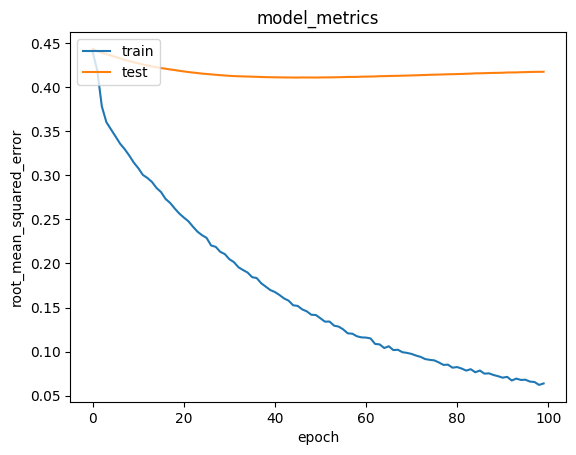

In [58]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Mendapatkan Rekomendasi Resto



*   Mmebuat variabel book_not_read dengan menggunakan operator bitwise (~) pada variabel book_read_by_user.

In [59]:
book_df = book_new
df = pd.read_csv('/content/book-recommendation-dataset/Ratings.csv')

# Mengambil sample user
user_id = df['User-ID'].sample(1).iloc[0]
book_read_by_user = df[df['User-ID'] == user_id]

# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html
book_not_read = book_df[~book_df['id'].isin(book_read_by_user.ISBN.values)]['id']
book_not_read = list(
    set(book_not_read)
    .intersection(set(book_to_book_encoded.keys()))
)

book_not_read = [[book_to_book_encoded.get(x)] for x in book_not_read]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_read), book_not_read)
)



*   Memperoleh rekomendasi buku menggunakan fungsi model.predict() dari library Keras

In [63]:
ratings = model.predict(user_book_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_book_ids = [
    book_encoded_to_book.get(book_not_read[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Book with high ratings from user')
print('----' * 8)

top_book_user = (
    book_read_by_user.sort_values(
        by = 'Book-Rating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)

book_df_rows = book_df[book_df['id'].isin(top_book_user)]
for row in book_df_rows.itertuples():
    print(row.book_title, ':', row.book_author)

print('----' * 8)
print('Top 10 book recommendation')
print('----' * 8)

recommended_book = book_df[book_df['id'].isin(recommended_book_ids)]
for row in recommended_book.itertuples():
    print(row.book_title, ':', row.book_author)

98/98 [==============================] - 0s 2ms/step
Showing recommendations for users: 11676
Book with high ratings from user
--------------------------------
Dark Cities Underground : Lisa Goldstein
The Berets (Brotherhood of War Book V) : W. E. B. Griffin
AS YOU LIKE IT : William Shakespeare
The New Dog Handbook : H. J. Ullman
Luck of the Draw : Chris Gudgeon
--------------------------------
Top 10 book recommendation
--------------------------------
Danny the Champion of the World (Puffin Novels) : Roald Dahl
Making Mr Right / I Waxed My Legs for This? (Duets, 43) : Holly Jacobs
Foreign Affairs : Alison Lurie
Micro Fiction: An Anthology of Really Short Stories : Jerome Stern
Dearly Beloved : Mary Jo Putney
Understanding Pregnancy (R) : Sheldon H. Cherry
Boone: A Novel Based on the Life and Times of Daniel Boone : Cameron Judd
A Cry In The Night : Mary Higgins Clark
Faith the Cow : Susan Bame Hoover
The scrabble book : Derryn Hinch
